In [1]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# setting up kaggle to download dataset
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading dataset
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset -p /content/drive/MyDrive/Simpsons

100% 1.08G/1.08G [01:01<00:00, 19.8MB/s]
100% 1.08G/1.08G [01:01<00:00, 18.9MB/s]


In [ ]:
# unzipping the dataset
!unzip /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset.zip -d /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/

In [4]:
# initializing variables
IMG_SIZE = (30, 30)
CHANNELS = 3
data_dir = r'/content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset'
TEST_SIZE = 0.2

In [5]:
def load_data():
  # storing character name and quantity in a dictonary
  data_dict = {}
  for data in os.listdir(data_dir):
    data_dict[data] = len(os.listdir(os.path.join(data_dir, data)))

  # sorting dictonary in decending order of values of dictonary
  data_dict = sorted(data_dict.items(), key=lambda x:x[1], reverse=True)

  # getting top 10 classes with max samples 
  classes = []
  count = 0
  for i in data_dict:
    classes.append(i[0])
    count += 1
    if count >= 10:
      break
  print("top 10 classes:", classes)

  # loading data
  features = []
  labels = []
  for folder in classes:
    folder_path = os.path.join(data_dir, folder)
    folder_label = classes.index(folder)
    # message
    if os.path.isdir(folder_path):
      print(f"Loading files from {folder_path}")
    # appending data with features and labels
    for file in os.listdir(folder_path):
      # preprocessing data
      img = cv.imread(os.path.join(folder_path, file))
      img = cv.resize(img, IMG_SIZE)
      img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
      features.append(img)
      labels.append(folder_label)

  return features, labels, classes

In [6]:
# loading data
features, labels, classses = load_data()

# converting integer labeles to binary matrices to use categorical_crossentropy loss fn
labels = tf.keras.utils.to_categorical(labels)

# performing train test split
x_train, x_test, y_train, y_test =  train_test_split(np.array(features), np.array(labels), test_size=TEST_SIZE)

top 10 classes: ['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/homer_simpson
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/ned_flanders
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/moe_szyslak
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/lisa_simpson
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/marge_simpson
Loading files from /content/drive/MyDrive/Simpsons/the-simpsons-characters-dataset/simpsons_dataset/krusty_the_clow

13811 13811
image shape: (30, 30, 3)


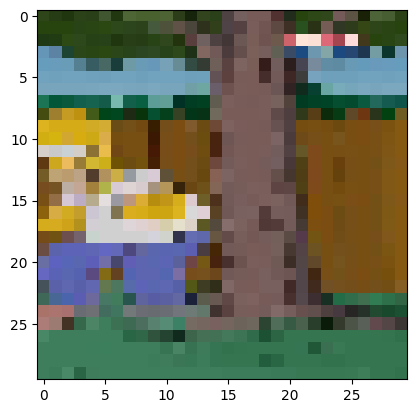

In [21]:
print(len(features), len(labels))
print("image shape:", features[0].shape)
plt.imshow(features[0])
plt.show()

In [22]:
def get_model():
    # defining model
    model = tf.keras.models.Sequential([
        
        # adding convolutional layer with 128 filters by 3x3 kernal
        tf.keras.layers.Conv2D(128, (3,3), activation="relu", input_shape=(30, 30, 3)),
        
        # adding max_pooling layer with pool size 2x2 with 10% dropout
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.10),
        
        # adding convolutional layer with 252 filters by 3x3 kernal
        tf.keras.layers.Conv2D(252, (3,3), activation="relu"),
        
        # adding max_pooling layer with pool size 2x2 with 25% dropout
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.25),

        # adding convolutional layer with 256 filters by 6x6 kernal
        tf.keras.layers.Conv2D(512, (3,3), activation="relu"),
        
        # adding max_pooling layer with pool size 2x2 with 10% dropout
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Dropout(0.10),

        # flattening all the units with dropout with 40%
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.40),
        
        # adding hidden layer with 1024 units with 45% dropout
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dropout(0.10),
        
        # adding output layer with 10 units to get probablity for 10 digits with softmax activation fn
        tf.keras.layers.Dense(10, activation="softmax")
    ])
    
    # compiling model
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    
    # getting model summary
    model.summary()
    return model

In [23]:
# getting model
model = get_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 128)       3584      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 252)       290556    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 252)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 252)        

In [24]:
# training model
history = model.fit(x_train, y_train, epochs=40, validation_data=(x_test,  y_test))

Epoch 1/40
346/346 [==============================] - 7s 9ms/step - loss: 3.8429 - accuracy: 0.2696 - val_loss: 1.6647 - val_accuracy: 0.4336
Epoch 2/40
346/346 [==============================] - 3s 9ms/step - loss: 1.5351 - accuracy: 0.4761 - val_loss: 1.2598 - val_accuracy: 0.5892
Epoch 3/40
346/346 [==============================] - 3s 9ms/step - loss: 1.2407 - accuracy: 0.5838 - val_loss: 0.9970 - val_accuracy: 0.6656
Epoch 4/40
346/346 [==============================] - 3s 10ms/step - loss: 1.0590 - accuracy: 0.6476 - val_loss: 0.9234 - val_accuracy: 0.7293
Epoch 5/40
346/346 [==============================] - 3s 9ms/step - loss: 0.9442 - accuracy: 0.6837 - val_loss: 0.7616 - val_accuracy: 0.7441
Epoch 6/40
346/346 [==============================] - 3s 9ms/step - loss: 0.8473 - accuracy: 0.7134 - val_loss: 0.6963 - val_accuracy: 0.7716
Epoch 7/40
346/346 [==============================] - 3s 9ms/step - loss: 0.7901 - accuracy: 0.7352 - val_loss: 0.7294 - val_accuracy: 0.7571
Epoch

87/87 - 0s - loss: 0.5341 - accuracy: 0.8534 - 325ms/epoch - 4ms/step


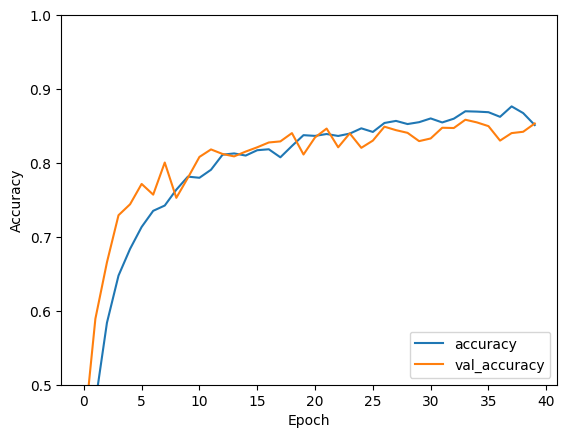

In [25]:
# plotting evaluation graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluating the model
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [26]:
def predict(img):
  img = cv.imread(img)
  img = cv.resize(img, (30, 30))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img = np.expand_dims(img, axis=0)
  predictions = model.predict(img)
  predictions = classses[np.argmax(predictions)]
  return predictions

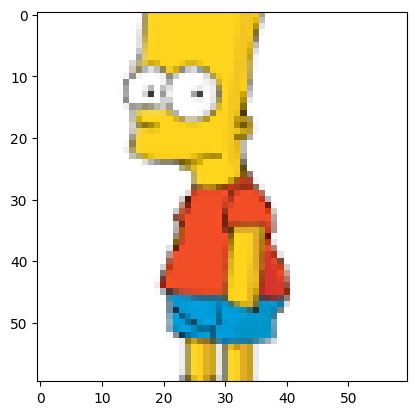

1/1 [==============================] - 0s 84ms/step
bart_simpson


In [27]:
test_img = r"/content/test.png"

image = cv.imread(test_img)
image = cv.resize(image, (60,60))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

prediction = predict(test_img)
print(prediction)

In [28]:
filename = "simpsons.h5"
model.save(filename)